In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## 1 base model

### 1.1 load data

In [2]:
data=pd.read_csv('mean_merged.csv')

In [3]:
data.head()

,Reef.ID,reef_latitude,reef_longitude,Year,Month,S1,S2,S3,S4,Average_bleaching,...,rate_of_SST_change,eta,salt,temp,wspeed_u,wspeed_v,mean_wspeed,u,v,mean_cur
0,14.51.84E.16.14.50S,-16.241667,145.864,2011,3,4.0,2.5,6.5,10.0,5.75,...,0.018763,0.022501,33.301152,29.543096,-2.704580,1.507381,4.623763,-0.129272,0.142504,0.294943
1,14.51.84E.16.14.50S,-16.241667,145.864,2012,6,10.0,5.0,10.0,5.0,7.50,...,0.018763,0.038542,34.810118,25.272271,-3.246589,5.446759,6.586625,-0.078906,0.056615,0.180601
2,14.51.84E.16.14.50S,-16.241667,145.864,2013,5,6.0,11.0,2.0,5.0,6.00,...,0.018763,0.167768,34.755774,26.540766,-5.724248,5.733466,8.527769,-0.124774,0.117997,0.265399
3,14.51.84E.16.14.50S,-16.241667,145.864,2015,8,20.0,35.0,40.0,20.0,28.75,...,0.018763,0.015005,35.342737,24.620164,-4.035695,4.153192,6.170029,-0.028284,-0.101760,0.206028
4,145.33.480E.16.22.630S,-16.377167,145.558,2013,8,1.0,1.0,5.0,0.0,1.75,...,0.018763,0.085692,35.327310,24.774833,-3.621766,4.102522,5.802169,-0.041876,-0.085202,0.199118


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Reef.ID                                265 non-null    object 
 1   reef_latitude                          265 non-null    float64
 2   reef_longitude                         265 non-null    float64
 3   Year                                   265 non-null    int64  
 4   Month                                  265 non-null    int64  
 5   S1                                     265 non-null    float64
 6   S2                                     265 non-null    float64
 7   S3                                     265 non-null    float64
 8   S4                                     265 non-null    float64
 9   Average_bleaching                      265 non-null    float64
 10  ClimSST                                265 non-null    float64
 11  Temper

### model data

In [29]:
y1=np.array(data['Average_bleaching'])
y2=np.array(data['ClimSST'])
y3=np.array(data['Temperature_Kelvin'])
y4=np.array(data['Temperature_Kelvin_Standard_Deviation'])
y5=np.array(data['SSTA_Frequency'])
y6=np.array(data['SSTA_Frequency_Standard_Deviation'])
y7=np.array(data['TSA_Frequency_Standard_Deviation'])
y8=np.array(data['mean_cur'])

X=data.drop(labels=['Reef.ID','Average_bleaching','ClimSST',
                    'Temperature_Kelvin','Temperature_Kelvin_Standard_Deviation',
                    'SSTA_Frequency','SSTA_Frequency_Standard_Deviation',
                    'TSA_Frequency_Standard_Deviation','mean_cur'],axis=1)
X=StandardScaler().fit_transform(X)
X

array([[ 2.06959707e+00, -2.06664392e+00, -1.47221074e+00, ...,
        -1.86434853e+00, -2.53623106e+00,  1.72303810e+00],
       [ 2.06959707e+00, -2.06664392e+00, -8.32643781e-01, ...,
         5.51944714e-01, -1.42691874e+00,  1.09226343e+00],
       [ 2.06959707e+00, -2.06664392e+00, -1.93076819e-01, ...,
         2.94150459e+00, -2.43717288e+00,  1.54305365e+00],
       ...,
       [-6.74167257e-01,  6.16124591e-01, -1.47221074e+00, ...,
        -8.74167878e-02,  2.01356676e-01,  7.88780081e-01],
       [-6.74167257e-01,  6.16124591e-01, -8.32643781e-01, ...,
        -7.53776738e-01,  6.87547425e-01,  2.96477214e-01],
       [-6.74167257e-01,  6.16124591e-01, -1.93076819e-01, ...,
         2.70949241e-01,  7.76939572e-01, -2.10700223e-03]])

In [30]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X,y1,test_size=0.2,random_state=420)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X,y2,test_size=0.2,random_state=420)
xtrain3,xtest3,ytrain3,ytest3=train_test_split(X,y3,test_size=0.2,random_state=420)
xtrain4,xtest4,ytrain4,ytest4=train_test_split(X,y4,test_size=0.2,random_state=420)
xtrain5,xtest5,ytrain5,ytest5=train_test_split(X,y5,test_size=0.2,random_state=420)
xtrain6,xtest6,ytrain6,ytest6=train_test_split(X,y6,test_size=0.2,random_state=420)
xtrain7,xtest7,ytrain7,ytest7=train_test_split(X,y7,test_size=0.2,random_state=420)
xtrain8,xtest8,ytrain8,ytest8=train_test_split(X,y8,test_size=0.2,random_state=420)

In [33]:
y9=np.array(data['Average_bleaching'])

X=data.loc[:,['ClimSST','Temperature_Kelvin','Temperature_Kelvin_Standard_Deviation',
        'SSTA_Frequency','SSTA_Frequency_Standard_Deviation',
        'TSA_Frequency_Standard_Deviation','mean_cur']]
X=StandardScaler().fit_transform(X)


xtrain9,xtest9,ytrain9,ytest9=train_test_split(X,y9,test_size=0.2,random_state=420)
X

array([[ 0.39772879,  2.09727537, -0.96184718, ...,  0.71061518,
        -0.21604196, -0.08248026],
       [ 0.05621261,  0.03209586, -0.96184718, ...,  0.71061518,
        -0.21604196, -1.27186954],
       [ 0.08313712,  0.75326965, -0.96184718, ...,  0.71061518,
        -0.21604196, -0.38979833],
       ...,
       [-0.46527269, -2.07991312, -0.20074269, ..., -0.87721155,
        -0.67509937, -1.35596575],
       [-0.36182588, -1.81298516, -0.20074269, ..., -0.87721155,
        -0.67509937, -0.89834773],
       [-0.11383695, -0.70312678, -0.20074269, ..., -0.87721155,
        -0.67509937, -0.72292454]])

## model

In [34]:
#choose the svm model
def kernel_selction(xtrain,ytrain,xtest,ytest):
    kernels=['linear', 'poly', 'rbf', 'sigmoid']
    r2=[]
    for k in kernels:
        svr=SVR(kernel=k).fit(xtrain,ytrain)
        r2.append(svr.score(xtest,ytest)) #choose rbf
    plt.figure(figsize=(10,8))
    plt.plot(kernels,r2)
    plt.title('kernel selection')
    plt.grid()
    plt.show()

In [35]:
def C_selection(m,n,j,k,xtrain,ytrain,xtest,ytest):
    c=np.arange(m,n,j)
    r2=[]
    for i in c:
        svr=SVR(kernel=k,C=i).fit(xtrain,ytrain)
        r2.append(svr.score(xtest,ytest))
    plt.figure(figsize=(10,8))
    plt.plot(c,r2)
    plt.grid()
    plt.title('C-selection')
    plt.show()

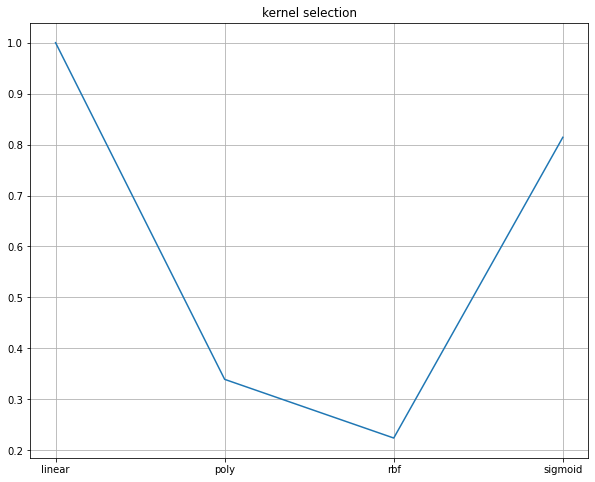

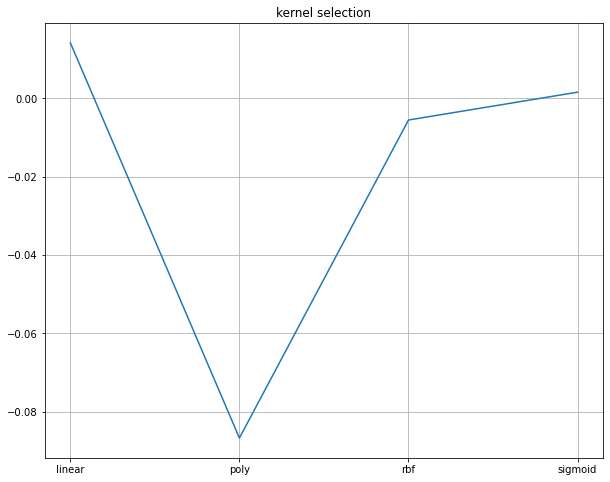

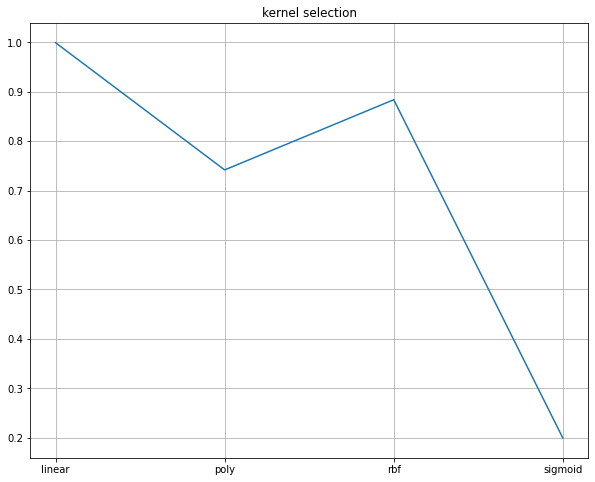

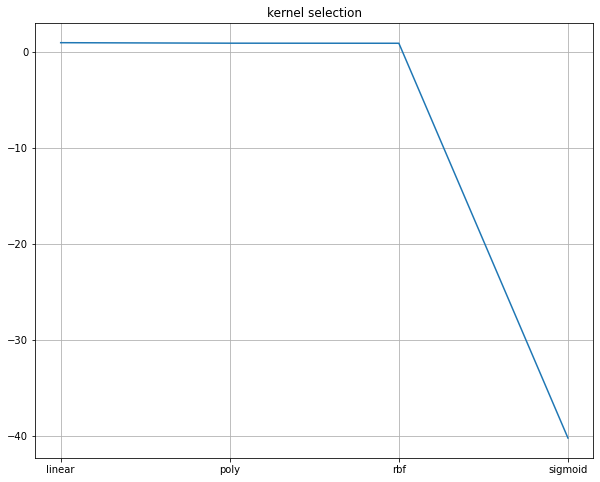

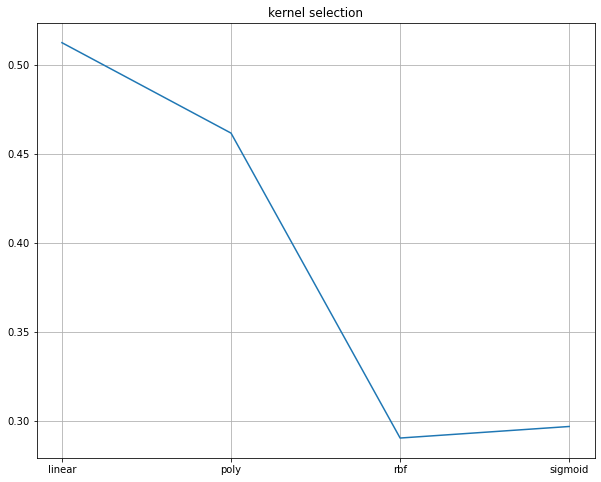

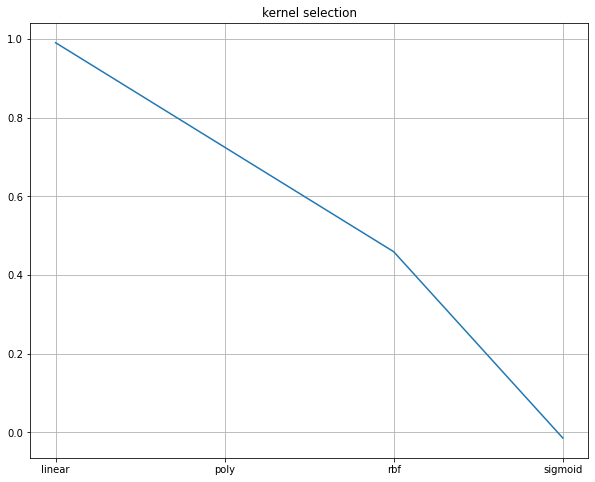

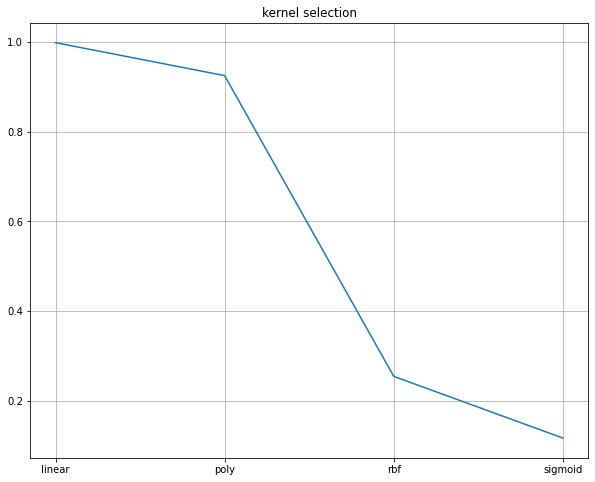

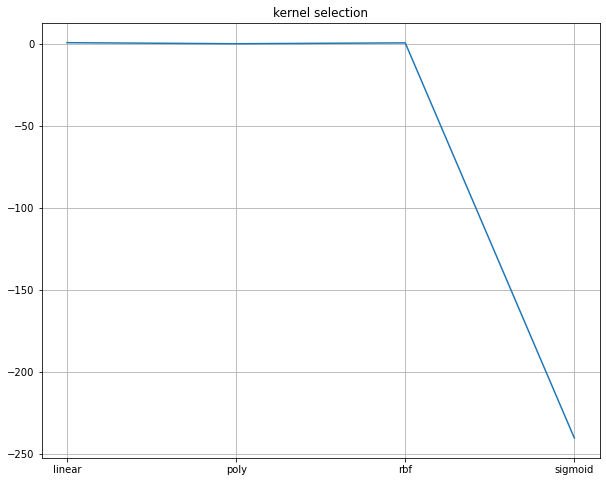

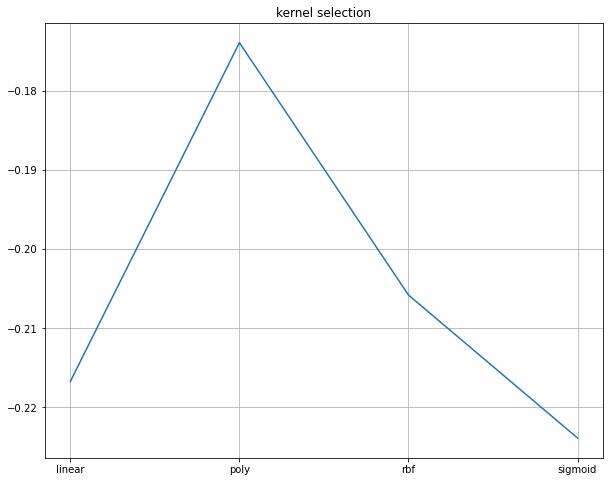

In [36]:
kernel_selction(xtrain1,ytrain1,xtest1,ytest1)
kernel_selction(xtrain2,ytrain2,xtest2,ytest2)
kernel_selction(xtrain3,ytrain3,xtest3,ytest3)
kernel_selction(xtrain4,ytrain4,xtest4,ytest4)
kernel_selction(xtrain5,ytrain5,xtest5,ytest5)
kernel_selction(xtrain6,ytrain6,xtest6,ytest6)
kernel_selction(xtrain7,ytrain7,xtest7,ytest7)
kernel_selction(xtrain8,ytrain8,xtest8,ytest8)

kernel_selction(xtrain9,ytrain9,xtest9,ytest9)

### 2.1 accuracy

In [11]:
svr=SVR(kernel='linear',C=100).fit(xtrain1,ytrain1)
ypred1=svr.predict(xtest1)
r2=svr.score(xtest1,ytest1)
mse=mean_squared_error(ytest1,ypred1)
mae=mean_absolute_error(ytest1,ypred1)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.999910679334597
MSE: 0.006820335539977419
MAE: 0.0630831693841073


In [12]:
svr=SVR(kernel='linear',C=100).fit(xtrain2,ytrain2)
ypred2=svr.predict(xtest2)
r2=svr.score(xtest2,ytest2)
mse=mean_squared_error(ytest2,ypred2)
mae=mean_absolute_error(ytest2,ypred2)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.05394177355202323
MSE: 47.527211455630564
MAE: 1.7842634250504046


In [13]:
svr=SVR(kernel='linear',C=100).fit(xtrain3,ytrain3)
ypred3=svr.predict(xtest3)
r2=svr.score(xtest3,ytest3)
mse=mean_squared_error(ytest3,ypred3)
mae=mean_absolute_error(ytest3,ypred3)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.9990757187685201
MSE: 0.004648301733756661
MAE: 0.05574218840176275


In [14]:
svr=SVR(kernel='linear',C=100).fit(xtrain4,ytrain4)
ypred4=svr.predict(xtest4)
r2=svr.score(xtest4,ytest4)
mse=mean_squared_error(ytest4,ypred4)
mae=mean_absolute_error(ytest4,ypred4)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.964475411800417
MSE: 0.003526108149978723
MAE: 0.04962252390640662


In [15]:
svr=SVR(kernel='linear',C=100).fit(xtrain5,ytrain5)
ypred5=svr.predict(xtest5)
r2=svr.score(xtest5,ytest5)
mse=mean_squared_error(ytest5,ypred5)
mae=mean_absolute_error(ytest5,ypred5)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.5058049404782345
MSE: 17.630923351518124
MAE: 2.771038261247674


In [16]:
svr=SVR(kernel='linear',C=100).fit(xtrain6,ytrain6)
ypred6=svr.predict(xtest6)
r2=svr.score(xtest6,ytest6)
mse=mean_squared_error(ytest6,ypred6)
mae=mean_absolute_error(ytest6,ypred6)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.9911187358557646
MSE: 0.024794559156681054
MAE: 0.12416655809825528


In [17]:
svr=SVR(kernel='linear',C=100).fit(xtrain7,ytrain7)
ypred7=svr.predict(xtest4)
r2=svr.score(xtest4,ytest4)
mse=mean_squared_error(ytest7,ypred7)
mae=mean_absolute_error(ytest7,ypred7)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: -28.492813440366483
MSE: 0.0048002779154597075
MAE: 0.05734221003774479


In [18]:
svr=SVR(kernel='linear',C=100).fit(xtrain8,ytrain8)
ypred8=svr.predict(xtest8)
r2=svr.score(xtest8,ytest8)
mse=mean_squared_error(ytest8,ypred8)
mae=mean_absolute_error(ytest8,ypred8)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: 0.6246048705216964
MSE: 0.003562426199795607
MAE: 0.05185420044821192


In [19]:
svr=SVR(kernel='linear',C=100).fit(xtrain9,ytrain9)
ypred9=svr.predict(xtest9)
r2=svr.score(xtest9,ytest9)
mse=mean_squared_error(ytest9,ypred9)
mae=mean_absolute_error(ytest9,ypred9)
print('R_squared:',r2)
print('MSE:',mse)
print('MAE:',mae)

R_squared: -0.21606658892280284
MSE: 92.85625155148105
MAE: 5.026576028605043


### 2.2 stability  and scalability

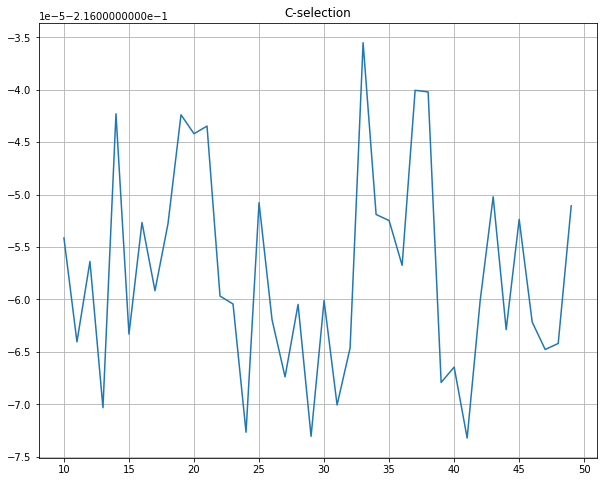

In [20]:
C_selection(10,50,1,'linear',xtrain9,ytrain9,xtest9,ytest9)

In [21]:
def pred_plot(true,pred):
    plt.figure(figsize=(10,8),dpi=200)
    plt.plot(np.arange(true.shape[0]),true,label='True')
    plt.plot(np.arange(true.shape[0]),pred,label='Predict')
    plt.grid()
    plt.legend()
    plt.show()

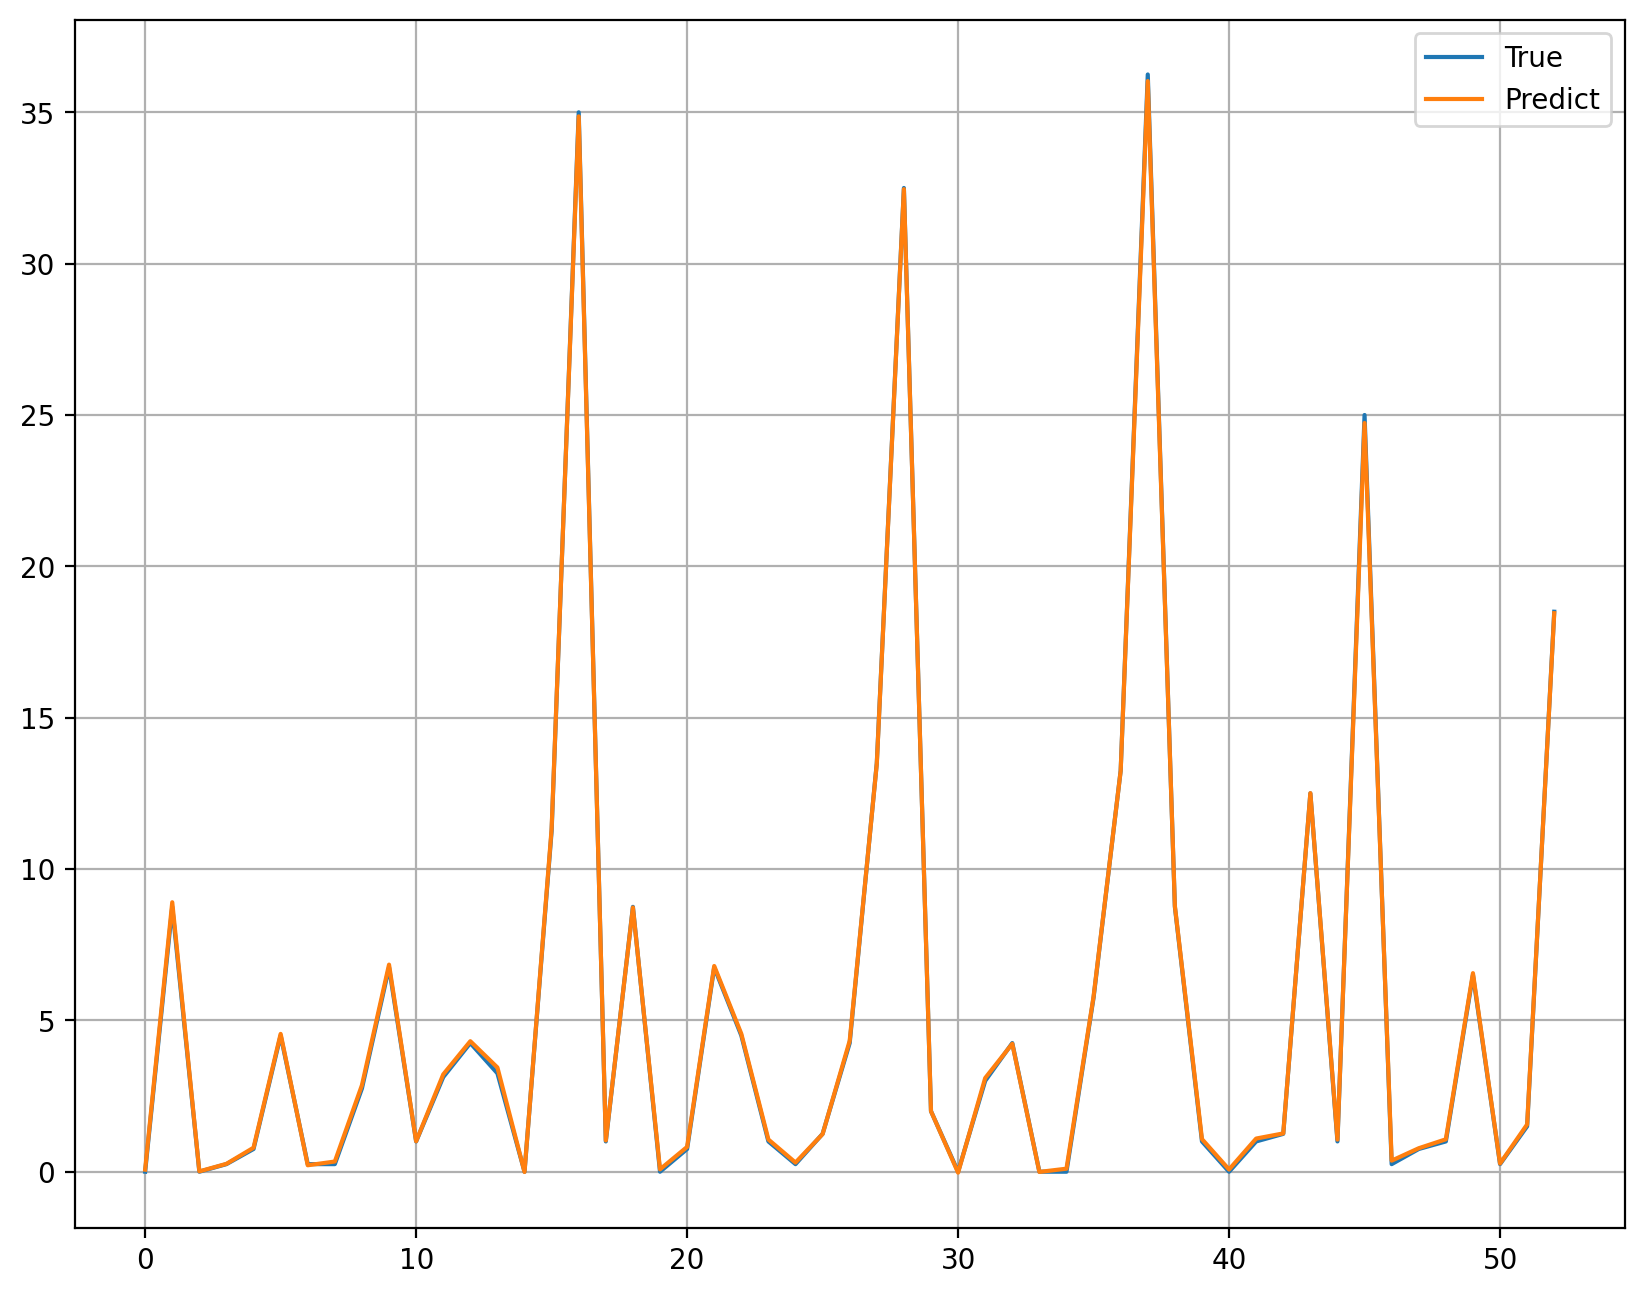

In [22]:
pred_plot(ytest1,ypred1)

### 2.3 interpretability

In [23]:
svr.coef_

array([[ 0.30395825,  0.22862304, -0.08657978, -0.26134834,  0.99316535,
         0.38826339,  0.17683838]])

In [24]:
svr.coef0

0.0